In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("Input/Simulation4.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.
chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
best_log = np.where(log_prob == log_prob.max())
print(log_prob.max())

175.65184580719065


In [5]:
#parameters of best walker
best_walker = chain[best_log][1]

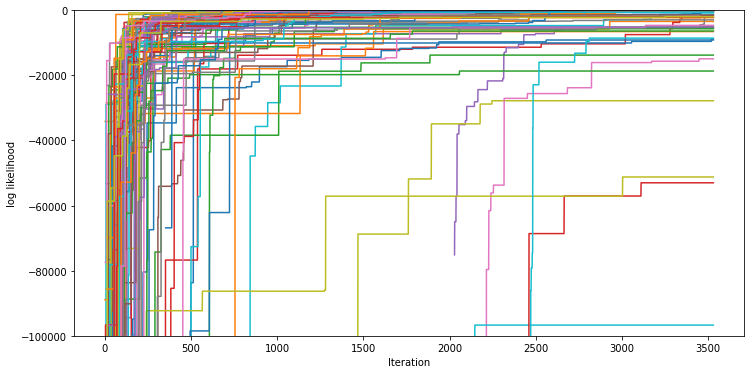

In [9]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-1e5, 200)
    plt.xlim()
    plt.ylabel("log likelihood")
    plt.xlabel("Iteration")

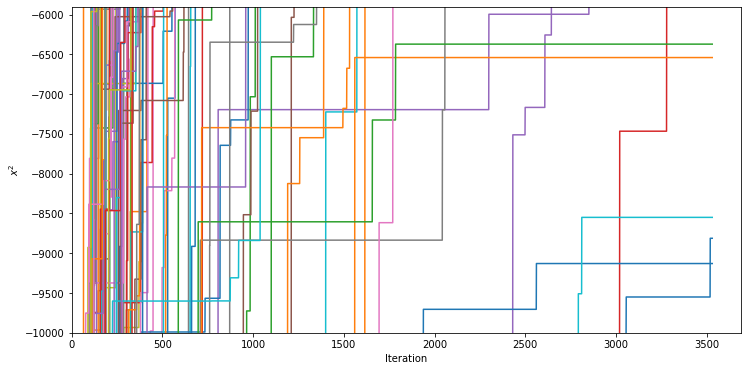

In [7]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-10000, -5900)
    plt.xlim(0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [10]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 107


array([33., 13., 15., 26., 12.,  0., 32., 23., 27.,  0., 12., 33., 21.,
        0., 20., 37.,  0., 12., 28., 15., 25., 14., 16., 36., 26., 20.,
       12., 20.,  9., 20., 30., 11., 23., 18.,  0., 35., 31., 12., 24.,
       28., 21., 21., 34., 27., 23., 36., 18., 10.,  0., 11., 10., 12.,
       18., 14., 24., 24., 21., 14., 21., 19., 16., 24.,  9., 22., 29.,
       15., 17., 17., 25., 22., 25.,  0.,  8., 41., 31., 23., 18., 27.,
        0., 42.,  0., 25.,  0., 15., 24., 14., 24., 28., 20., 18.,  0.,
       17., 12., 21., 22., 14., 23., 23., 11., 13., 26., 15., 12., 20.,
       19.,  0., 22., 20., 17., 35., 45., 24.,  0., 20., 25., 12., 26.,
       27., 12., 16.])

In [37]:
labels = list(pars_input.keys())
labels

['ml',
 'beta',
 'qinc',
 'log_mbh',
 'kappa_s',
 'qDM',
 'mag_shear',
 'phi_shear',
 'gamma']

/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:41: RuntimeWarning: invalid value encountered in less
  m = np.arange(len(taus)) < c * taus
/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:99: RuntimeWarning: invalid value encountered in greater
  flag = tol * tau_est > n_t


[nan nan nan nan nan nan nan nan nan]
flat chain shape: (423720, 9)
flat log prob shape: (423720,)


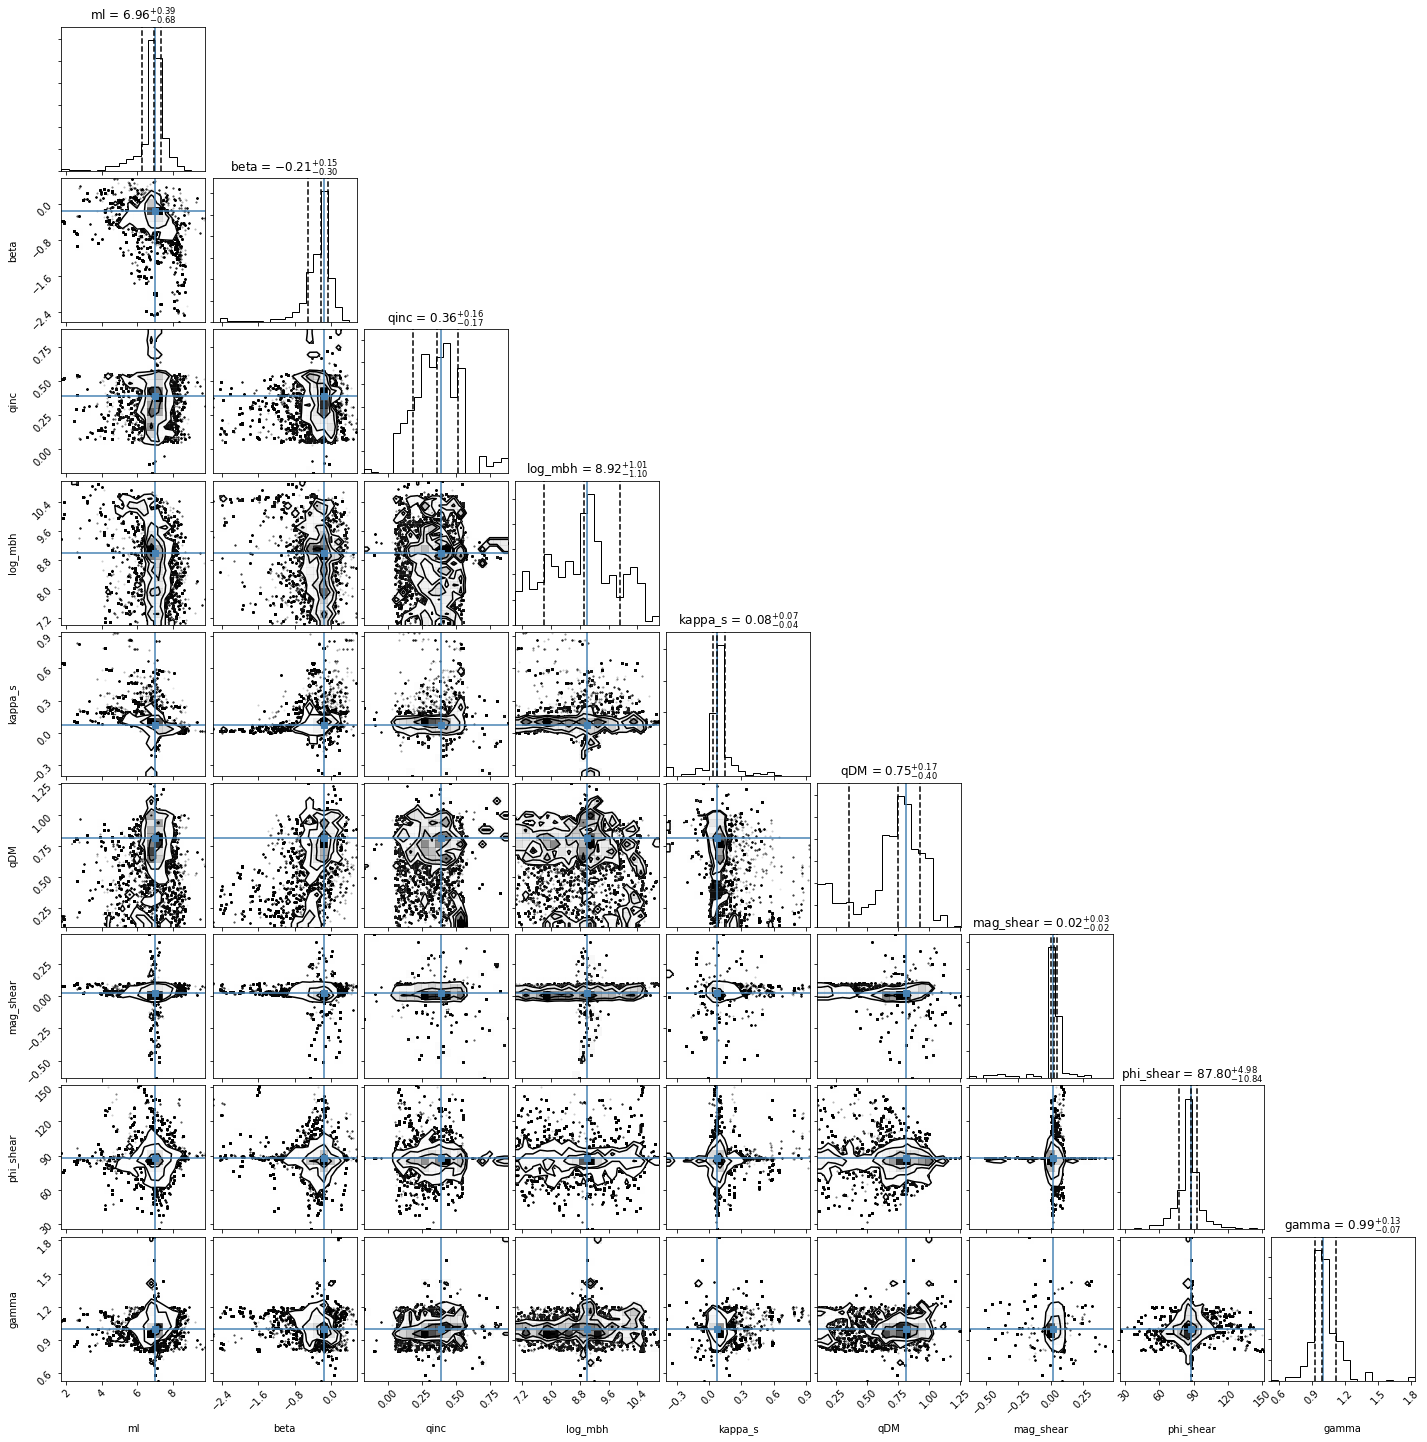

In [21]:
#Corner plots

pars_input = {'ml': 7.0, 'beta': -0.15, 'qinc': 0.38837304829549607, 'log_mbh': 9.0, 
          'kappa_s': 0.075, 'qDM': 0.813731905546916, 'mag_shear': 0.02, 'phi_shear': 88.0, 'gamma': 1.0}

labels = list(pars_input.keys())
truth = list(pars_input.values())


tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],truths=truth,
                       show_titles=True, title_kwargs={"fontsize": 12});

flat chain shape: (6000, 9)
flat log prob shape: (6000,)


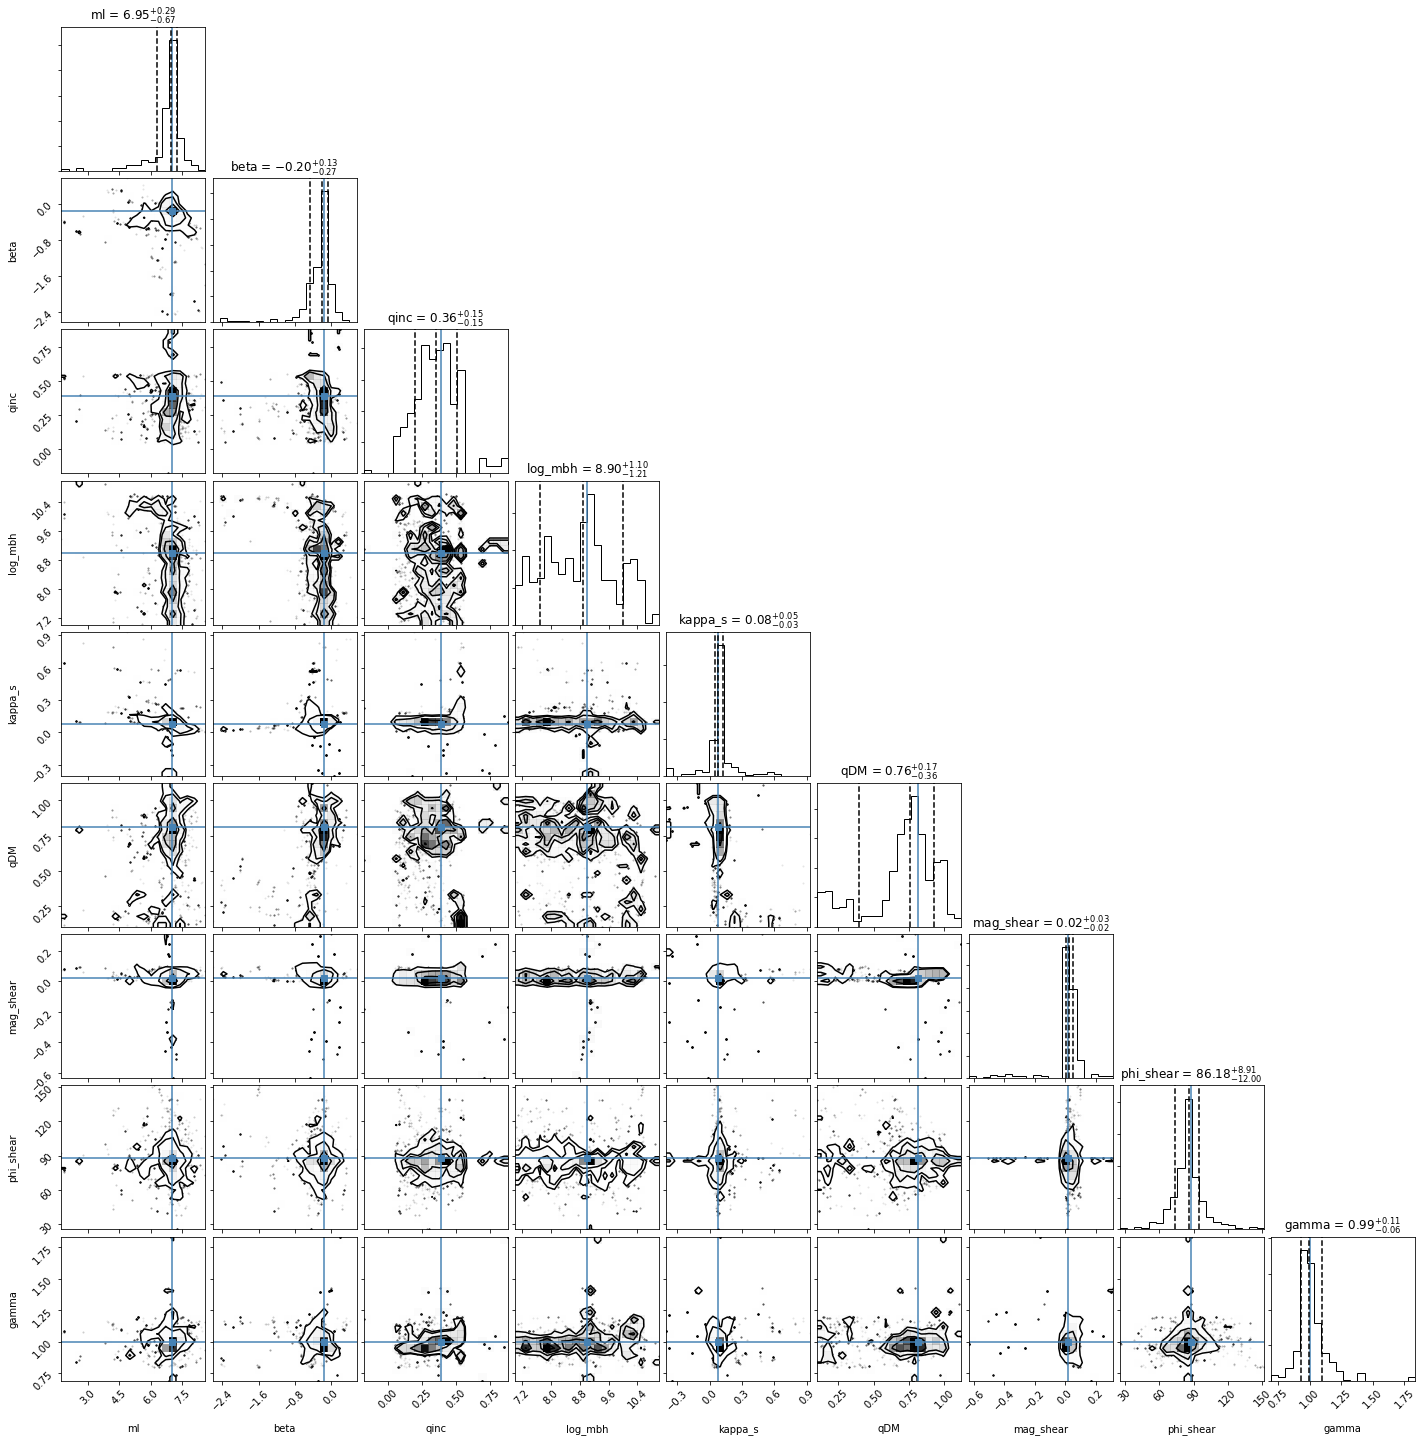

In [38]:
#Corner plots
tau = read.get_autocorr_time(tol=0)
#burnin = int(2 * np.max(tau))
#thin = int(0.5 * np.max(tau))
#print(burnin, thin)



samples = read.get_chain(discard=1000, flat=True,thin=50 )
log_prob_samples = read.get_log_prob(discard=1000,flat=True,thin=50)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)


corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12}, truths=truth);

In [39]:
from IPython.display import display, Math
best_fit = np.zeros(len(labels))

for i in range(9):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    best_fit[i] = mcmc[1]
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [40]:
tau = read.get_autocorr_time(tol=0)
print(tau, read.iteration/50)

/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:41: RuntimeWarning: invalid value encountered in less
  m = np.arange(len(taus)) < c * taus


[nan nan nan nan nan nan nan nan nan] 70.62


/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:99: RuntimeWarning: invalid value encountered in greater
  flag = tol * tau_est > n_t


In [41]:
labels

['ml',
 'beta',
 'qinc',
 'log_mbh',
 'kappa_s',
 'qDM',
 'mag_shear',
 'phi_shear',
 'gamma']

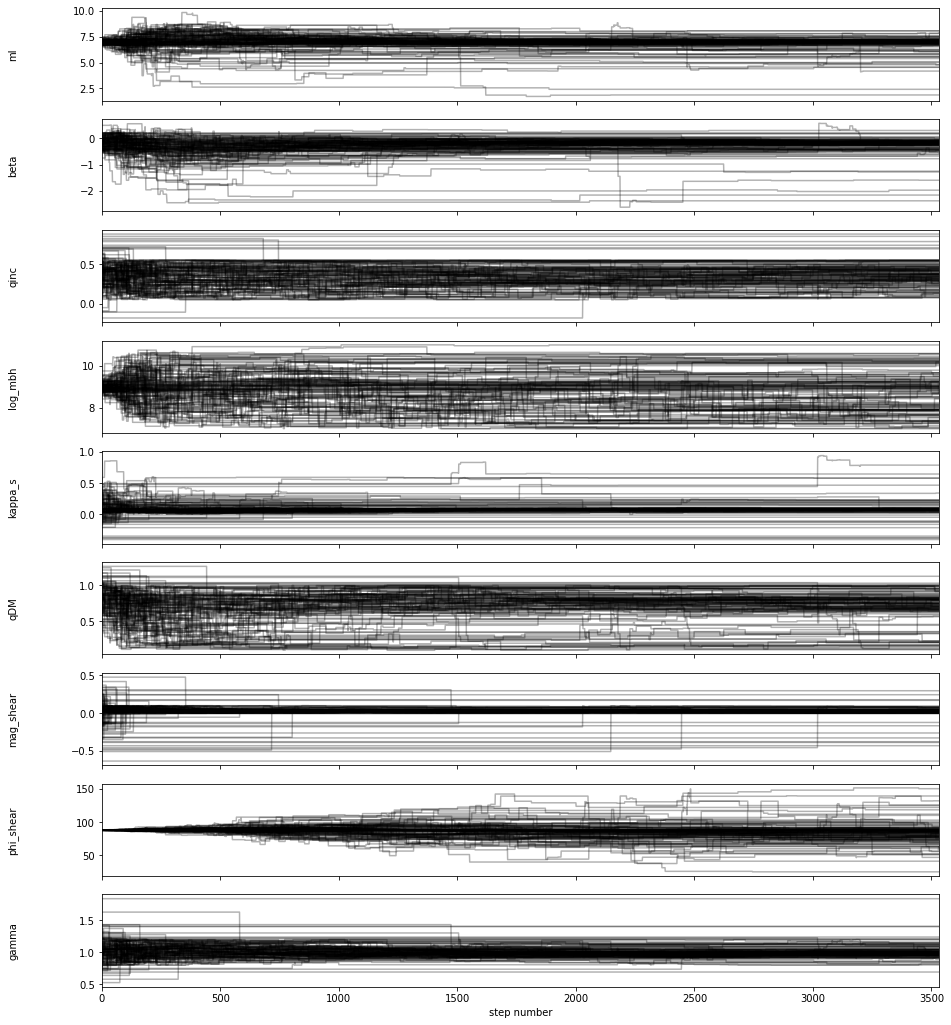

In [44]:
#Walke of each walker
fig, axes = plt.subplots(len(labels), figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [14]:
it, accep_tot, time, accep_100 = np.loadtxt("Input/Output_LogFile.txt", unpack=True)

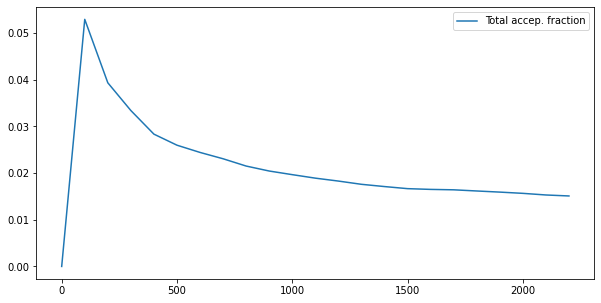

In [15]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

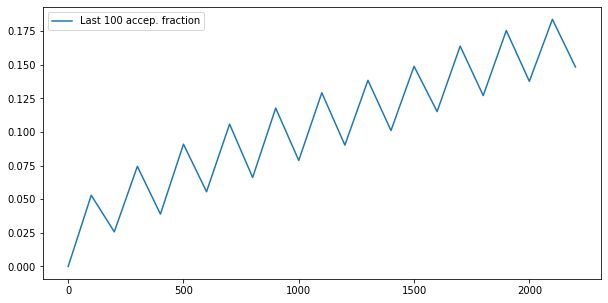

In [16]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
#plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [24]:
import autolens as al
import autolens.plot as aplt
import numpy as np

from time import perf_counter as clock

from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import z_at_value
import astropy.units as u

import CombinedModel
from My_Jampy import JAM

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/Autolens tests/autolens_workspace/Test_4/Simulation_Data/"

#Reading inputs
surf_lum, sigma_lum, qobs_lum = np.loadtxt("Input/JAM_Input.txt", unpack=True)      #MGE decomposition
surf_dm, sigma_dm , qobs_dm   = np.loadtxt("Input/eNFW.txt", unpack=True)           #DM component
norm_psf, sigma_psf           = np.loadtxt("Input/MUSE_Psf_model.txt", unpack=True) #PSF
x, y, vrms, erms              = np.loadtxt("Input/vrms_data.txt", unpack=True)      #vrms data

#Only for lensing modelling 
z_l    = 0.299                                                         #Lens Redshift
z_s    = 4.100                                                         #Source Redshift 
D_l    = cosmo.angular_diameter_distance(z_l).value                    #Distance to lens [Mpc] 
mbh    = 1e9                                                           #mass of black hole [log10(M_sun)]
kappa_ = 0.075                                                         #kappa_s of DM profile
r_s    = 11.5
ml     = 7.00                                                          #mass to light ratio
phi_shear = 88                                                         #Inclination of external shear [deg]
mag_shear = 0.02                                                       #magnitude of shear
shear_comp = al.convert.shear_elliptical_comps_from(magnitude=mag_shear, phi=phi_shear) #external shear

beta    = np.full_like(surf_lum, -0.15)                                 #anisotropy [ad]
inc     = 65                                                            #inclination [deg]
inc_rad = np.radians(inc)
qinc    = np.sqrt(np.min(qobs_lum)**2 - 
                    (1 - np.min(qobs_lum)**2)/np.tan(inc_rad)**2)       #Deprojected axial ratio for inclination
qDM     = np.sqrt( qobs_dm[0]**2 - np.cos(inc_rad)**2)/np.sin(inc_rad)  #Deprojected DM axial ratio
pixsize = 0.2                                                           #MUSE pixel size

imaging = al.Imaging.from_fits(
        image_path=f"{data_folder}/arcs_simulation.fits",
        noise_map_path=f"{data_folder}/noise_simulation.fits",
        psf_path=f"{data_folder}/psf_simulation.fits",
        pixel_scales=0.1,
    )

mask        = al.Mask.from_fits( file_path=f"{data_folder}/new_mask.fits", hdu=1, 
                                    pixel_scales=imaging.pixel_scales)#You should check Mask_Maker folder before continue

masked_image = al.MaskedImaging(imaging=imaging, mask=mask, inversion_uses_border=True)     #Masked image


#aplt.Imaging.subplot_imaging(
#    imaging=imaging, mask=mask, include=aplt.Include(border=True),                         #Plot
#)


Jam_model = JAM(ybin=y*pixsize, xbin=x*pixsize, inc=inc, distance=D_l, mbh=mbh, beta=beta, rms=vrms, erms=erms,
                   normpsf=norm_psf, sigmapsf=sigma_psf*pixsize, pixsize=pixsize)

#Add Luminosity component
Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum, ml=ml)

#Add DM component
Jam_model.DM_component(surf_dm=kappa_ * surf_dm, sigma_dm=sigma_dm, qobs_dm=qobs_dm)


#Elliptical components in Pyautolens units
ell_comps = al.convert.elliptical_comps_from(axis_ratio=qobs_dm[0], phi=0.0) #Elliptical components in Pyautolens units
eNFW      = al.mp.dark_mass_profiles.EllipticalNFW(kappa_s=kappa_, elliptical_comps=ell_comps, scale_radius=r_s) #elliptical NFW

mass_profile = al.mp.MGE()                            #MGE mass model
mass_profile.Analytic_Model(analytic_profile=eNFW)   #Include the analytical pENFW

#Components
mass_profile.MGE_comps(z_l=z_l, z_s=z_s, 
                       surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum, ml=ml,
                       mbh=mbh) #DON'T INCLUDE THE MGE PARAMETRIZATION OF DM

#Lens galaxy
lens_galaxy = al.Galaxy(
    redshift=z_l,
    mass=mass_profile,
    shear=al.mp.ExternalShear(elliptical_comps=shear_comp)
)

#Starting Model
model_MGE = CombinedModel.Models(Jampy_model=Jam_model, mass_profile=mass_profile,
                                 masked_imaging=masked_image, quiet=False)

#Setup Configurations

model_MGE.mass_to_light(ml_kind='scalar')                                          #Setting scalar ML
model_MGE.beta(beta_kind='scalar')                                                 #Seting vector anisotropy
model_MGE.has_MGE_DM(a=True, filename="Input/eNFW.txt", include_MGE_DM="Dynamical")#Setting Dark matter component
model_MGE.include_DM_analytical(analytical_DM=eNFW)                                #Analytical eNFW

Change qinc limits to [0.0501, 0.55], defaults are [0.0, 1]


## Best Model

In [45]:
p0 = best_fit
p0

array([ 6.95022349e+00, -1.97430149e-01,  3.55359165e-01,  8.90159334e+00,
        7.80851509e-02,  7.56212064e-01,  2.30001593e-02,  8.61832982e+01,
        9.90152860e-01])

ParsDic {'ml': 6.950223487272055, 'beta': -0.19743014873994086, 'qinc': 0.35535916547097546, 'log_mbh': 8.9015933362198, 'kappa_s': 0.07808515090066707, 'qDM': 0.7562120636918545, 'mag_shear': 0.0230001593101018, 'phi_shear': 86.18329823562435, 'gamma': 0.9901528600120906}
jam_axi_rms elapsed time sec: 0.61
inc=63.3 beta_z=-0.20 M/L=1 BH=7.97e+08 chi2/DOF=13.5
Total mass MGE: 3.829e+13
Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.10417898830236053)
axis_ratio: 0.81130054202076
phi: 0.0
kappa_s: 0.07808515090066707
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: -606.2503347648345
Log Normalization -1317.2315249194833
Log Evidence: -1419.6279392839542
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 0.9901528600120906
analytic_prof

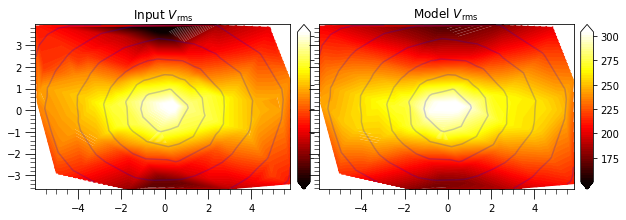

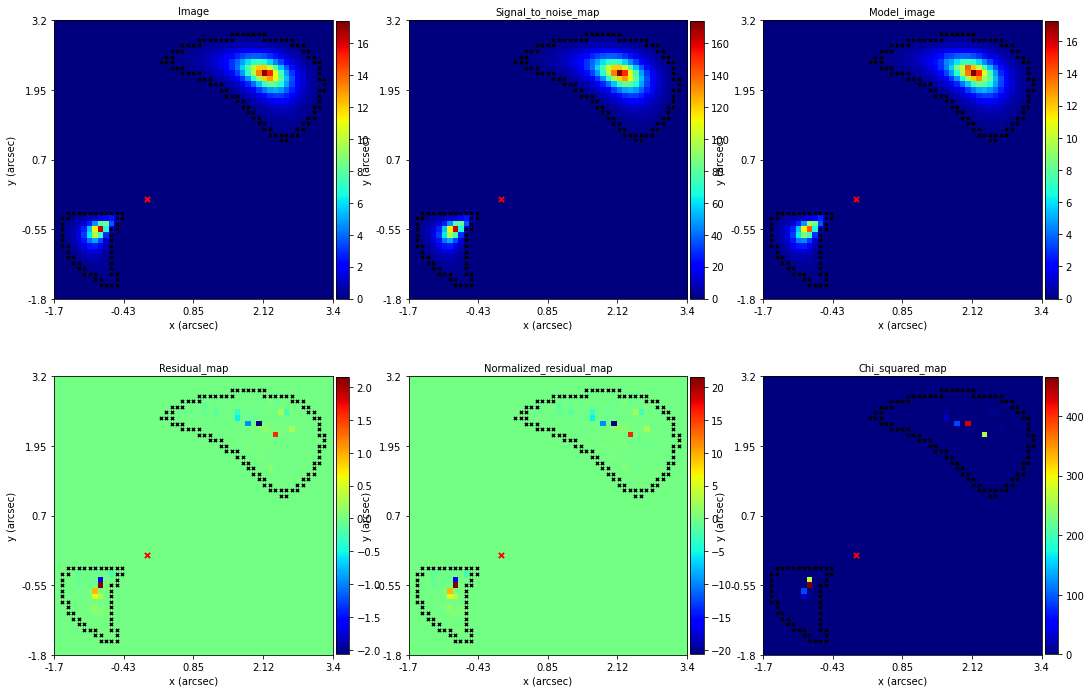

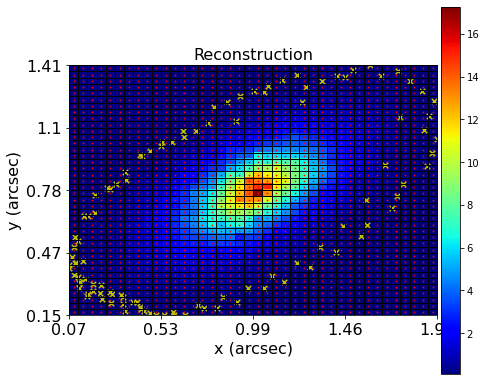

-1282.3209610250633

In [46]:
plt.figure(figsize=(10,10))
model_MGE(p0)

## Best likelihood

In [47]:
p0 = best_walker
p0

array([ 7.11999202e+00, -1.67664753e-01,  4.07671544e-01,  8.63096335e+00,
        7.01152968e-02,  8.31611593e-01,  2.76542567e-02,  8.39622947e+01,
        1.00858859e+00])

ParsDic {'ml': 7.119992022335729, 'beta': -0.167664753004565, 'qinc': 0.4076715435080243, 'log_mbh': 8.630963351014447, 'kappa_s': 0.07011529677619388, 'qDM': 0.8316115932301545, 'mag_shear': 0.027654256743256944, 'phi_shear': 83.96229468037576, 'gamma': 1.0085885890555637}
jam_axi_rms elapsed time sec: 0.62
inc=66.2 beta_z=-0.17 M/L=1 BH=4.28e+08 chi2/DOF=1.06
Total mass MGE: 3.655e+13
Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.07446464489497884)
axis_ratio: 0.8613920983835495
phi: 0.0
kappa_s: 0.07011529677619388
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: 228.84094144743517
Log Normalization -1317.2315249194833
Log Evidence: -589.2433483914659
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 1.0085885890555637
analytic_pr

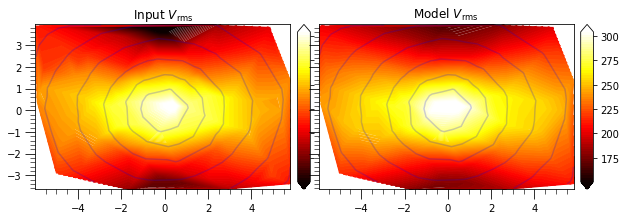

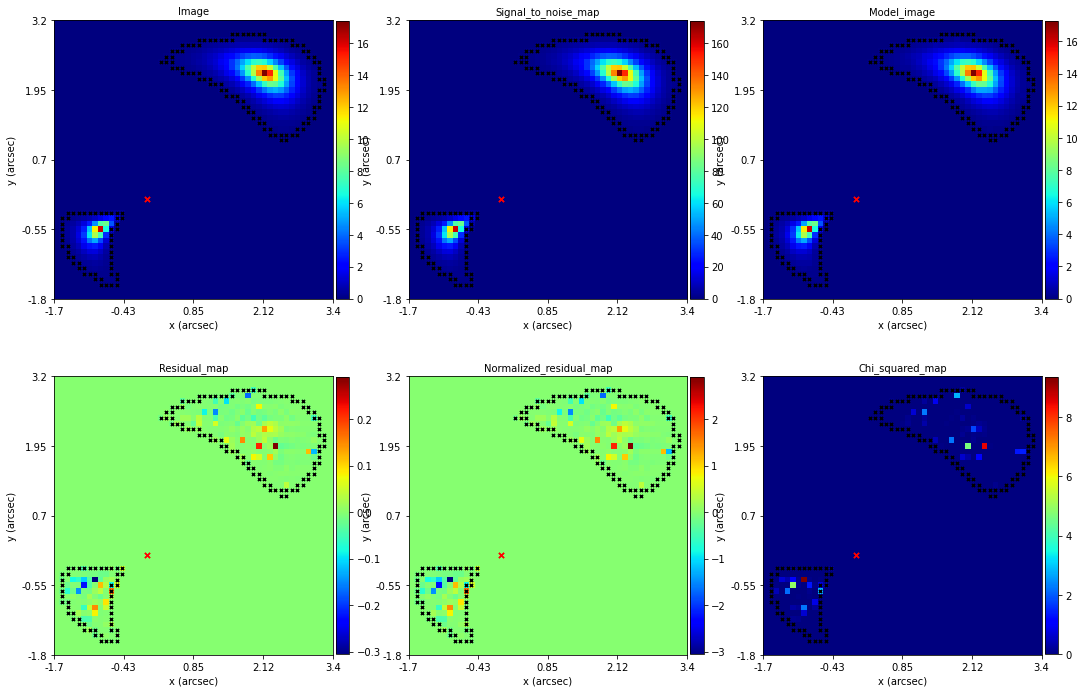

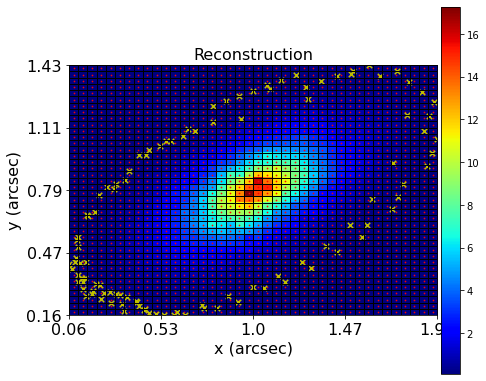

175.65184580718784

In [48]:
plt.figure(figsize=(10,10))
model_MGE(p0)

## Input Model

ParsDic {'ml': 7.0, 'beta': -0.15, 'qinc': 0.38837304829549607, 'log_mbh': 9.0, 'kappa_s': 0.075, 'qDM': 0.813731905546916, 'mag_shear': 0.02, 'phi_shear': 88.0, 'gamma': 1.0}
jam_axi_rms elapsed time sec: 0.62
inc=65.0 beta_z=-0.15 M/L=1 BH=1.00e+09 chi2/DOF=1
Total mass MGE: 3.854e+13
Including the following Analytical DM profile:
#------------------------------------#
EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.08108108108108115)
axis_ratio: 0.8499999999999999
phi: 0.0
kappa_s: 0.075
scale_radius: 11.5
inner_slope: 1.0


Lens Galaxy Configuration:
Log Likelihood_with_regularization: 169.12873738428277
Log Normalization -1317.2315249194833
Log Evidence: -640.3839755037264
#------------------------------------#
Redshift: 0.299
Mass Profiles:
MGE
centre: (0.0, 0.0)
epsabs: 1e-10
epsrel: 1e-05
processes: 1
method: quadva
gamma: 1.0
analytic_profile: EllipticalNFW
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.08108108108108115)
axis_ratio: 0.8499999999999999
phi: 0.0
kappa_

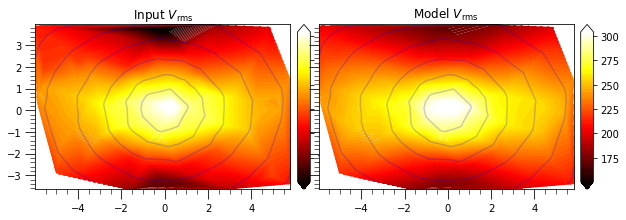

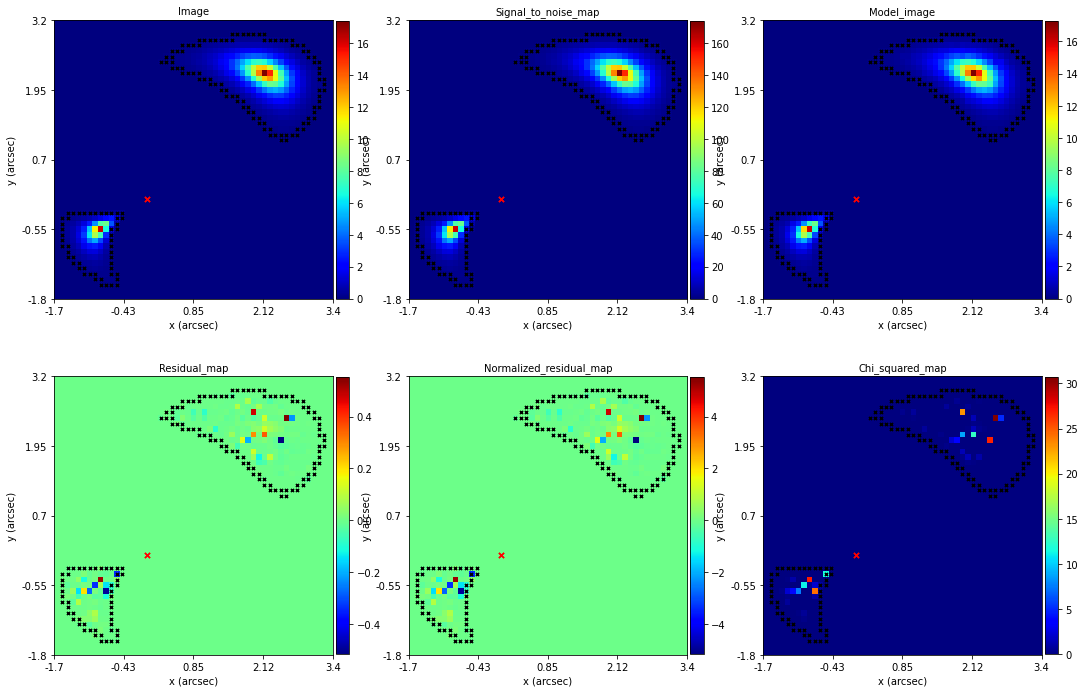

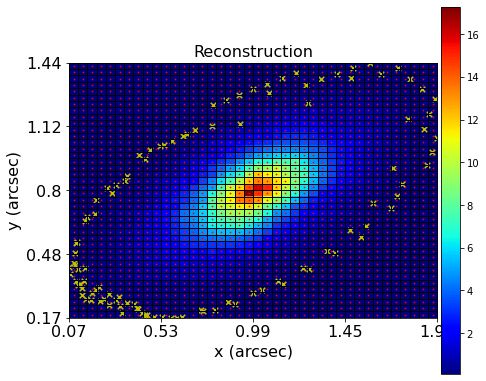

119.12874881920143

In [49]:
plt.figure(figsize=(10,10))

p0 = truth
model_MGE(p0)

(0.9, 1.1)

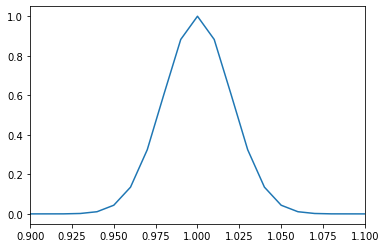

In [54]:
import matplotlib.pyplot as plt
x = np.arange(0, 2, 0.01)
exp = np.e**(-0.5 * (x - 1)**2/0.02**2)
plt.plot(x, exp)
plt.xlim(0.9, 1.1)